# Setup

In [19]:
from mobilkit.umni import *
from project import *

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import yaml

## Download data

In [21]:
# %%bash
# path=../data/nhts
# mkdir -p $path; cd $path
# url="https://nhts.ornl.gov/assets/2016/download/csv.zip"
# wget $url
# unzip csv.zip
# echo "Download link: $url" >> README.md

## Load tables

In [22]:
per = pd.read_csv('../data/nhts/perpub.csv').disp()

264,234 rows x 121 cols; Memory: 296.5 MiB


,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,GT1JBLWK,WRK_HOME,WKFTPT,WRKTRANS,LSTTRDAY17,OCCAT,SCHTYP,NWALKTRP,WALK4EX,NBIKETRP,BIKE4EX,BIKESHARE,PTUSED,MCUSED,CARSHARE,RIDESHARE,CARRODE,TIMETOWK,NOCONG,PUBTIME,WRKTIME,WKRMHM,FLEXTIME,WKFMHMXX,SCHTRN1,SCHTRN2,DELIVER,MEDCOND,MEDCOND6,HEALTH,PHYACT,VPACT,LPACT,BORNINUS,YRTOUS,YEARMILE,PROXY,WHOPROXY,USEPUBTR,SAMEPLC,...,R_SEX_IMP,ALT_16,ALT_23,ALT_45,WALK_DEF,WALK_GKQ,BIKE_DFR,BIKE_GKP,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDTAX,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,...,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<float64>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>
0,30000007,1,67,3,2,1,2,2,6,2,-1,-1,-1,-1,-1,-1,-1,3,3,0,-1,-1,0,-1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,-1,2,2,-1,0,1,-1,1000,1,1,2,-1,...,2,3,1,4,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,1,3,5,7,3,NC,37,3,1,201608,1,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,206.690153,T,50,1500,750,750,20,750,300


In [23]:
hh = pd.read_csv('../data/nhts/hhpub.csv').disp()

129,696 rows x 58 cols; Memory: 76.6 MiB


,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,WALK,BIKE,CAR,TAXI,BUS,TRAIN,PARA,PRICE,PLACE,WALK2SAVE,BIKE2SAVE,PTRANS,HHRELATD,DRVRCNT,CNTTDHH,HHSTATE,HHSTFIPS,NUMADLT,YOUNGCHILD,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,SCRESP,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,RESP_CNT,WEBUSE17,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<int64>,<int64>,<float64>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>
0,30000007,2,3,1,3,5,7,2,1,2,5,5,1,5,4,5,5,1,2,4,4,4,1,3,6,NC,37,3,0,1,201608,1,10,3,1,2,1,1,1,1,5,3,53,2,2,XXXXX,3,1,2,187.31432,T,50,1500,750,750,20,750,300


In [24]:
trip = pd.read_csv('../data/nhts/trippub.csv').disp()

923,572 rows x 115 cols; Memory: 1037.8 MiB


,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,VEHID,TRWAITTM,NUMTRANS,TRACCTM,DROP_PRK,TREGRTM,WHODROVE,WHYFROM,LOOP_TRIP,TRPHHVEH,HHMEMDRV,HH_ONTD,NONHHCNT,NUMONTRP,PSGR_FLG,PUBTRANS,TRIPPURP,DWELTIME,TDWKND,VMT_MILE,DRVR_FLG,WHYTRP1S,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,ONTD_P11,ONTD_P12,ONTD_P13,TDCASEID,TRACC_WLK,TRACC_POV,TRACC_BUS,TRACC_CRL,...,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,HHRESP,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,GASPRICE,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,R_AGE,EDUC,R_SEX,PRMACT,PROXY,WORKER,DRIVER,WTTRDFIN,WHYTRP90,TRPMILAD,R_AGE_IMP,R_SEX_IMP,VEHTYPE,OBHUR,DBHUR,OTHTNRNT,OTPPOPDN,OTRESDN,OTEEMPDN,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<float64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<int64>,<float64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,...,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<float64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<float64>,<int64>,<float64>,<int64>,<int64>,<int64>,<object>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>
0,30000007,1,1,1000,1015,15,5.244,3,0,0,3,-1,-1,-1,-1,-1,1,1,2,1,1,1,0,1,2,2,HBO,295,2,5.244,1,20,1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,300000070101,-1,-1,-1,-1,...,NC,37,3,1,201608,1,10,3,1,2,1,1,1,228.4,5,3,53,2,2,XXXXX,2,67,3,2,6,1,2,1,75441.905796,5,5.847584,67,2,1,T,T,50,1500,750,750,20,750,300,50,750,300,350,30,300,300


In [25]:
veh = pd.read_csv('../data/nhts/vehpub.csv').disp()

256,115 rows x 60 cols; Memory: 180.7 MiB


,HOUSEID,VEHID,VEHYEAR,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,HFUEL,VEHOWNED,VEHOWNMO,ANNMILES,HYBRID,PERSONID,TRAVDAY,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,DRVRCNT,HHSTATE,HHSTFIPS,NUMADLT,WRKCOUNT,TDAYDATE,LIF_CYC,MSACAT,MSASIZE,RAIL,URBAN,URBANSIZE,URBRUR,CENSUS_D,CENSUS_R,CDIVMSAR,HH_RACE,HH_HISP,HH_CBSA,SMPLSRCE,WTHHFIN,BESTMILE,BEST_FLG,BEST_EDT,BEST_OUT,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
,<int64>,<int64>,<int64>,<int64>,<object>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<object>,<int64>,<float64>,<float64>,<int64>,<int64>,<int64>,<object>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<float64>,<float64>,<int64>,<int64>,<float64>,<int64>
0,30000007,1,2007,10,49,49032,1,1,3,69000,-1,1,-1,1000,2,3,2,1,3,5,7,3,NC,37,3,1,201608,10,3,1,2,1,1,1,5,3,53,2,2,XXXXX,2,187.31432,14611.926637,1,-1,4,T,50,1500,750,750,20,750,300,487.064221,1126.457778,30,-9,2.31275,1


# Analysis

* [Census division classification](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf)

In [26]:
with open('../data/nhts/nhts-codes.yaml', 'r') as f:
    nhts_codes = yaml.safe_load(f)

In [27]:
trip2 = (
    trip.rename(columns={
        'HOUSEID': 'hh_id',
        'TRVLCMIN': 'duration',
        'TRPMILES': 'distance'})
    .assign(mode=trip.TRPTRANS.map(nhts_codes['mode']))
    .assign(purpose=trip.TRIPPURP.map(nhts_codes['purpose']))
    .assign(weekend=trip.TDWKND == 1)
    [['hh_id', 'weekend', 'mode', 'purpose', 'duration', 'distance']]
    .query('duration > 0 & distance > 0').dropna().reset_index(drop=1)
).disp()

910,150 rows x 6 cols; Memory: 133.8 MiB


,hh_id,weekend,mode,purpose,duration,distance
,<int64>,<bool>,<object>,<object>,<int64>,<float64>
0,30000007,False,DRIVE,Other,15,5.244


In [28]:
hh2 = (hh.rename(columns={'HOUSEID': 'hh_id', 'HHSTATE': 'state'})
       .assign(bg_rurality=hh.HBHUR.map(nhts_codes['rurality']))
       .assign(division=hh.CENSUS_D.map(nhts_codes['division']))
       [['hh_id', 'state', 'division', 'bg_rurality']]
       .dropna().reset_index(drop=True)).disp()

129,587 rows x 4 cols; Memory: 25.0 MiB


,hh_id,state,division,bg_rurality
,<int64>,<object>,<object>,<object>
0,30000007,NC,South Atlantic,Small town


In [29]:
# trip2.merge(hh2,on='hh_id').division.value_counts()

In [30]:
# trips by households in the Great Lakes area
trip_gl = trip2.merge(hh2.query('division=="East North Central"'), on='hh_id').disp(0)

106,640 rows x 9 cols; Memory: 35.9 MiB


,hh_id,weekend,mode,purpose,duration,distance,state,division,bg_rurality
,<int64>,<bool>,<object>,<object>,<int64>,<float64>,<object>,<object>,<object>


In [31]:
# trips by households in Indiana
trip_in = trip_gl.query('state=="IN"').disp(0)

3,564 rows x 9 cols; Memory: 1.2 MiB


,hh_id,weekend,mode,purpose,duration,distance,state,division,bg_rurality
,<int64>,<bool>,<object>,<object>,<int64>,<float64>,<object>,<object>,<object>


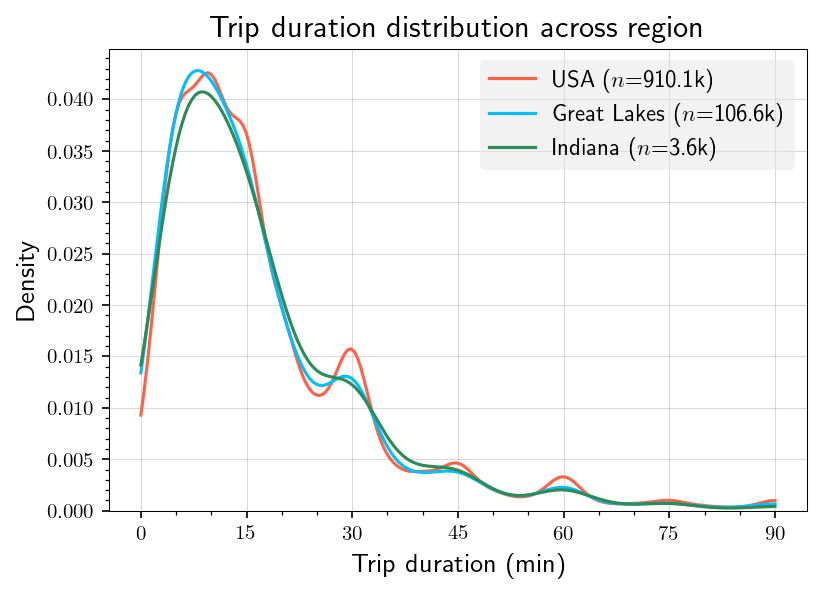

In [35]:
ax = U.plot(size=(6, 4), title='Trip duration distribution across region')
rgns = [('USA', trip2, 'tomato', 1.2),
        ('Great Lakes', trip_gl, 'deepskyblue', 1.1),
        ('Indiana', trip_in, 'seagreen', 0.6)]
colors = sns.color_palette('brg', len(rgns))
for rgn, wts, color, bw in rgns:
    sns.kdeplot(wts, x='duration', bw_adjust=bw, clip=(0, 90), color=color)
ax.legend(handles=[mpl.lines.Line2D(
    [0], [0], color=color, label=r'{} ($n$={:.1f}k)'.format(rgn, len(df) / 1e3))
    for rgn, df, color, _ in rgns])
ax.set_xlabel('Trip duration (min)')
ax.set_xticks(np.arange(0, 90+1, 15))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5));

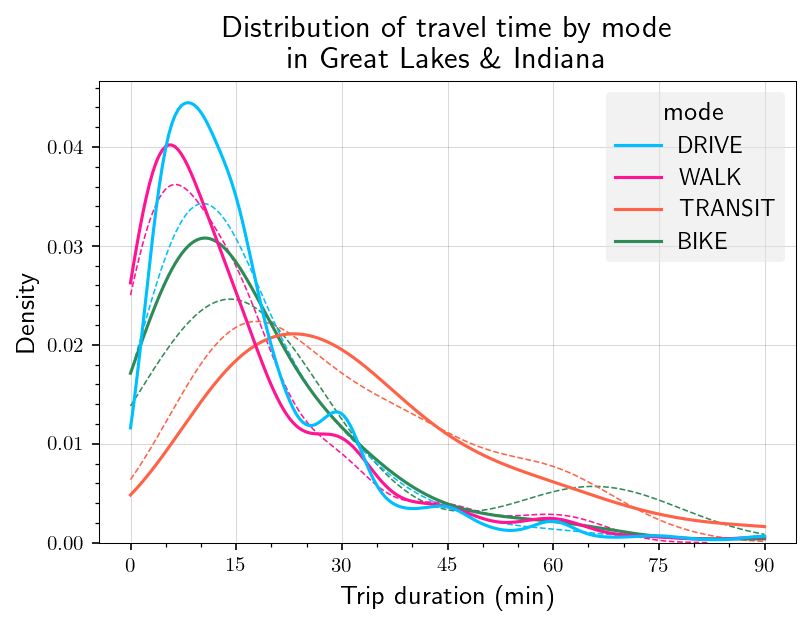

In [15]:
ax = U.plot(size=(6, 4), title='Distribution of travel time by mode\n in Great Lakes \& Indiana')
for wts, label, ls, lw in [(trip_in, 'Indiana', '--', 0.75),
                          (trip_gl, 'Great Lakes', '-', 1.5)]:
    sns.kdeplot(wts, ax=ax, x='duration', hue='mode', clip=(0, 90),
                palette=MODES.color.tolist(), ls=ls, lw=lw, common_norm=False)
ax.set_xlabel('Trip duration (min)')
ax.set_xticks(np.arange(0, 90+1, 15))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5));

In [16]:
trip_gl.groupby('mode').duration.describe()

,count,mean,std,min,25%,50%,75%,max
mode,,,,,,,,
BIKE,1209.0,21.878412,31.371085,1.0,7.0,15.0,25.0,504.0
DRIVE,94477.0,19.448966,28.669743,1.0,7.0,14.0,21.0,1140.0
TRANSIT,2379.0,36.955864,39.230092,1.0,19.0,30.0,45.0,840.0
WALK,8575.0,17.451195,27.218057,1.0,5.0,10.0,20.0,720.0


90 rows x 4 cols; Memory: 0.0 MiB


,BIKE,DRIVE,TRANSIT,WALK
t,<float64>,<float64>,<float64>,<float64>
1,0.010989,0.522527,0.002198,0.464286


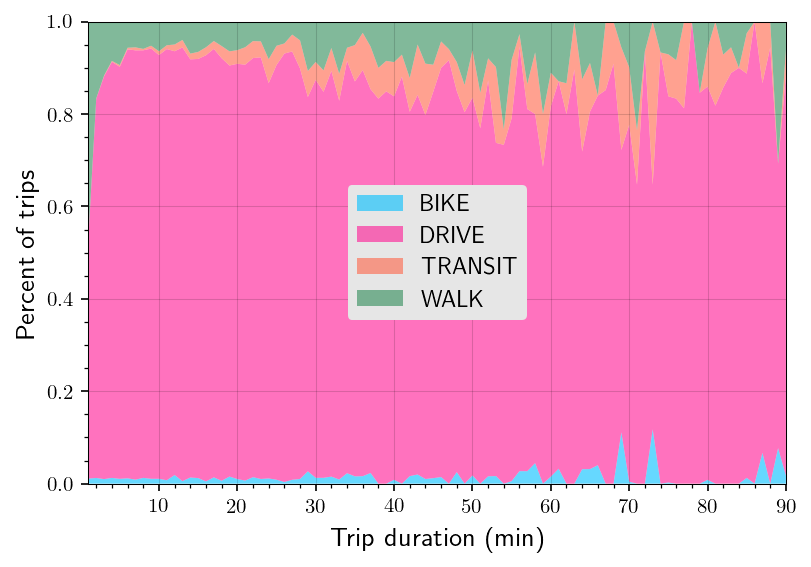

In [17]:
wts = (trip_gl.groupby('mode')['duration']
       .apply(lambda x: np.histogram(x.clip(0, 90), np.arange(0, 92))[0])
       .explode().rename('n').reset_index()
       .assign(t=np.tile(np.arange(0, 91), 4))
       .pivot_table('n', 't', 'mode').fillna(0)
       .assign(_total=lambda df: df.sum(1)))
wts = wts.div(wts._total, axis=0).dropna().drop(columns='_total')
wts.columns = wts.columns.tolist()
ax = U.plot(size=(6, 4), xlim=(1, 90), ylim=(0, 1),
            ylab='Percent of trips', xlab='Trip duration (min)')
ax.stackplot(wts.index, *[wts[x] for x in wts], labels=wts.columns, 
             colors=MODES.color, alpha=0.6)
ax.legend(loc='center', framealpha=1)
wts.disp(); pass

In [18]:
wts.to_csv('../data/nhts/trip-duration-distr-by-mode.csv')